In [3]:
# import torch
# import tinygrad
# import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
from tinygrad import Tensor, Context, Device
import math
%matplotlib inline

# %set_env GPU=0
# %set_env CPU=1
# print(Device.DEFAULT)
# Device.DEFAULT = 'CPU'
# print(Device.DEFAULT)

In [4]:
# read in all the words
words = open('..\\..\\makemore\\names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = Tensor(X)
Y = Tensor(Y)

In [8]:
X.shape, X.dtype, Y.shape, Y.dtype

((228146, 3), dtypes.int, (228146,), dtypes.int)

In [9]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = Tensor(X)
  Y = Tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


(182625, 3) (182625,)
(22655, 3) (22655,)
(22866, 3) (22866,)


In [10]:
C = Tensor.randn((27, 2))


In [11]:
emb = C[X]
emb.shape

(228146, 3, 2)

In [12]:
W1 = Tensor.randn((6, 100))
b1 = Tensor.randn(100)

In [13]:
h = Tensor.tanh(emb.view(-1, 6) @ W1 + b1)

In [14]:
h.numpy()

array([[-0.42349958, -0.6456887 ,  0.18336141, ..., -0.7217877 ,
        -0.76762956, -0.14423388],
       [ 0.2330792 , -0.9997708 ,  0.9991399 , ...,  0.96624875,
         0.40863168, -0.08861291],
       [-0.9808082 , -0.9883191 ,  0.7152451 , ..., -0.9527886 ,
        -0.9999468 ,  0.9982642 ],
       ...,
       [ 0.8237244 , -0.9968081 ,  0.9997966 , ...,  0.9988029 ,
         0.9942279 , -0.99980855],
       [ 0.9996586 ,  0.6879059 , -0.97796446, ..., -0.99994504,
        -0.46272343, -0.9975828 ],
       [-0.7758758 ,  0.9938861 , -0.99977505, ..., -0.9999999 ,
         0.9989296 , -0.9985379 ]], shape=(228146, 100), dtype=float32)

In [15]:
h.shape

(228146, 100)

In [16]:
W2 = Tensor.randn((100, 27))
b2 = Tensor.randn(27)

In [17]:
logits = h @ W2 + b2

In [18]:
logits.shape

(228146, 27)

In [19]:
counts = logits.exp()

In [20]:
prob = counts / counts.sum(1, keepdim=True)

In [21]:
prob.shape

(228146, 27)

In [22]:
# loss = -prob[Tensor.arange(32), Y].log().mean()
# loss

In [23]:
# ------------ now made respectable :) ---------------

In [24]:
Xtr.shape, Ytr.shape # dataset

((182625, 3), (182625,))

In [25]:
g = Tensor.manual_seed(2147483647) # for reproducibility
C = Tensor.randn((27, 10), generator=g)
W1 = Tensor.randn((30, 200), generator=g)
b1 = Tensor.randn(200, generator=g)
W2 = Tensor.randn((200, 27), generator=g)
b2 = Tensor.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [26]:
sum(p.numel() for p in parameters) # number of parameters in total

11897

In [27]:
for p in parameters:
  p.requires_grad = True

In [28]:
lre = Tensor.linspace(-3, 0, 1000)
lrs = 10**lre

In [29]:
lri = []
lossi = []
stepi = []

In [30]:
print(Tensor.randint(32, low=0, high=Xtr.shape[0]).numpy())

[ 32533  88668  85548 135301  11725 167054 116287 148646 150293  24009
  92777  27071  97023 149813  50353  62370   7624 136079  95559  98533
  28304 160497 103807  49733 112494 170246 172341 139199  94118  89612
  70219 169146]


In [33]:


print(Device.DEFAULT)


# with Context(DEBUG=0):
for i in range(100):
  
  # minibatch construct
  # ix = Tensor.randint(0, Xtr.shape[0], (32,))
  ix = Tensor.randint(32, low=0, high=Xtr.shape[0])
  # print(ix.numpy())
  # print(ix.shape)
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = Tensor.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = Tensor.cross_entropy(logits, Ytr[ix])
  # print(loss.item())
  
  # backward pass
  for p in parameters:
    # print(p.shape)
    p.grad = None
  
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  # Tensor.no_grad = True
  for p in parameters:
    # print(p.shape)
    # print(p.numpy())
    # print(p.dtype)
    # p.data += -lr * p.grad
    # p.data returns a memoryview so the above doesn't work
    p.requires_grad = False
    p.assign(p - lr * p.grad)
    p.requires_grad = True
    # this seems very slow
    # p.assign(p.detach() - lr * p.grad) 
    # p -= lr * p.grad
  # Tensor.no_grad  = False
  
  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(math.log10(loss.item()))

print(loss.item())

GPU


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

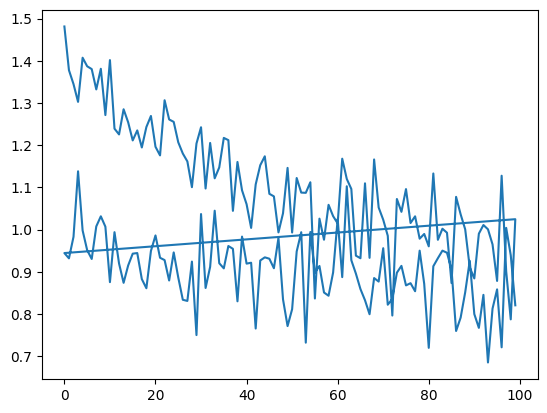

In [38]:
plt.plot(stepi, lossi)

In [40]:
emb = C[Xtr] # (32, 3, 2)
h = Tensor.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = Tensor.cross_entropy(logits, Ytr)
loss

<Tensor <UOp GPU () float (<Ops.MUL: 49>, None)> on GPU with grad None>

In [41]:
emb = C[Xdev] # (32, 3, 2)
h = Tensor.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = Tensor.cross_entropy(logits, Ydev)
loss

<Tensor <UOp GPU () float (<Ops.MUL: 49>, None)> on GPU with grad None>

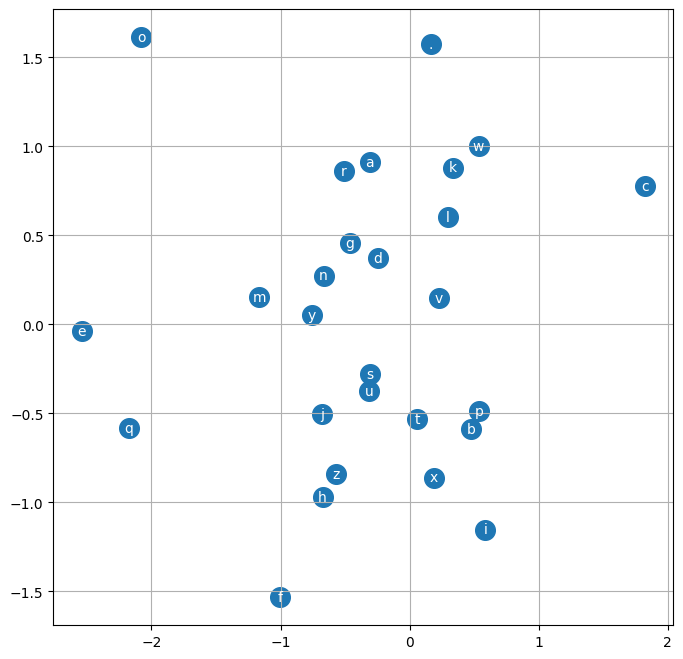

In [44]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data(), C[:,1].data(), s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [50]:
context = [0] * block_size
C[Tensor([context])].shape

(1, 3, 10)

In [ ]:


# sample from the model - can't set seed in tinygrad yet in multinomial
g = Tensor.manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[Tensor([context])] # (1,block_size,d)
      h = Tensor.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = Tensor.softmax(logits)
      ix = Tensor.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

yana.
jaaraklyfil.
maobeoleya.
jana.
jemori.
maolvjmbr.
ongnss.
zyv.
shani.
shanlkkyos.
ongns.
ahaiiha.
jai.
jemrimeliewcee.
jani.
zylgondayonsah.
kaolvcawdyronklynlamsa.
ongnsca.
lee.
jana.
